In [28]:
%matplotlib inline
import os
import sys
from os.path import join
from os.path import basename
import cv2
import json
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from utils import read_image
from utils import get_files
from utils import draw_bbox

from utils import xywh2xyxy

import seaborn as sns

import scipy.io
import random

import dftools 

from pycocotools.coco import COCO

In [26]:
img_dir = 'WiderFace/WIDER_train/loosecrop/images/'
annFile='WiderFace/WIDER_train/loosecrop/cropped_coco.json'
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


In [5]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
face



In [12]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['face']);
imgIds = coco.getImgIds(catIds=catIds);

In [10]:
catIds

[1]

In [14]:
len(imgIds)

12227

In [19]:
annIds = coco.getAnnIds(imgIds=imgIds, catIds=catIds, iscrowd=None)
print(len(annIds))
anns = coco.loadAnns(annIds)

12227


{'file_name': '0_Parade_marchingband_1_849_0.jpg', 'height': 248, 'width': 203, 'id': 1} {'area': 18178, 'iscrowd': 0, 'image_id': 1, 'bbox': [41, 50, 122, 149], 'category_id': 1, 'id': 1, 'ignore': 0, 'segmentation': []}


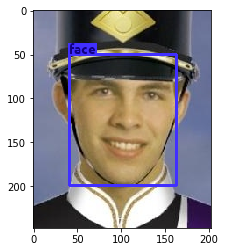

{'file_name': '0_Parade_Parade_0_904_1.jpg', 'height': 550, 'width': 438, 'id': 2} {'area': 89157, 'iscrowd': 0, 'image_id': 2, 'bbox': [88, 98, 263, 339], 'category_id': 1, 'id': 2, 'ignore': 0, 'segmentation': []}


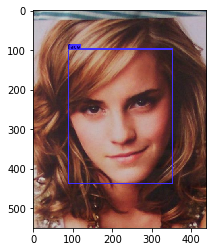

{'file_name': '0_Parade_Parade_0_577_4.jpg', 'height': 970, 'width': 758, 'id': 3} {'area': 264810, 'iscrowd': 0, 'image_id': 3, 'bbox': [152, 194, 455, 582], 'category_id': 1, 'id': 3, 'ignore': 0, 'segmentation': []}


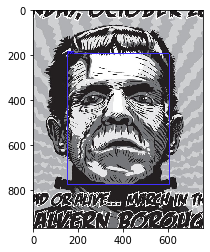

{'file_name': '0_Parade_Parade_0_883_5.jpg', 'height': 478, 'width': 365, 'id': 4} {'area': 62853, 'iscrowd': 0, 'image_id': 4, 'bbox': [73, 96, 219, 287], 'category_id': 1, 'id': 4, 'ignore': 0, 'segmentation': []}


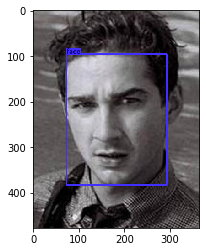

{'file_name': '0_Parade_marchingband_1_873_6.jpg', 'height': 423, 'width': 308, 'id': 5} {'area': 46990, 'iscrowd': 0, 'image_id': 5, 'bbox': [62, 85, 185, 254], 'category_id': 1, 'id': 5, 'ignore': 0, 'segmentation': []}


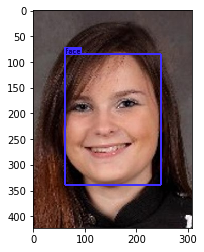

In [33]:
num = 5
for img_id, ann in zip(imgIds[:num], anns[:num]):
    imginfo = coco.loadImgs(img_id)[0]
    img = read_image(join(img_dir, imginfo['file_name']))
    draw_bbox(img, xywh2xyxy(ann['bbox']))
    print(imginfo, ann)
    plt.imshow(img)
    plt.show()